
Epoch 1: val_loss improved from inf to 0.24692, saving model to ./model/01-0.2469.hdf5

Epoch 2: val_loss did not improve from 0.24692


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.24692

Epoch 4: val_loss did not improve from 0.24692

Epoch 5: val_loss did not improve from 0.24692

Epoch 6: val_loss did not improve from 0.24692

Epoch 7: val_loss did not improve from 0.24692

Epoch 8: val_loss did not improve from 0.24692

Epoch 9: val_loss did not improve from 0.24692

Epoch 10: val_loss did not improve from 0.24692

Epoch 11: val_loss did not improve from 0.24692

Epoch 12: val_loss did not improve from 0.24692

Epoch 13: val_loss did not improve from 0.24692

Epoch 14: val_loss did not improve from 0.24692

Epoch 15: val_loss did not improve from 0.24692

Epoch 16: val_loss did not improve from 0.24692

Epoch 17: val_loss did not improve from 0.24692

Epoch 18: val_loss did not improve from 0.24692

Epoch 19: val_loss did not improve from 0.24692

Epoch 20: val_loss did not improve from 0.24692

Epoch 21: val_loss did not improve from 0.24692

Epoch 22: val_loss did not improve from 0.24692

Epoch 23: val_loss did not

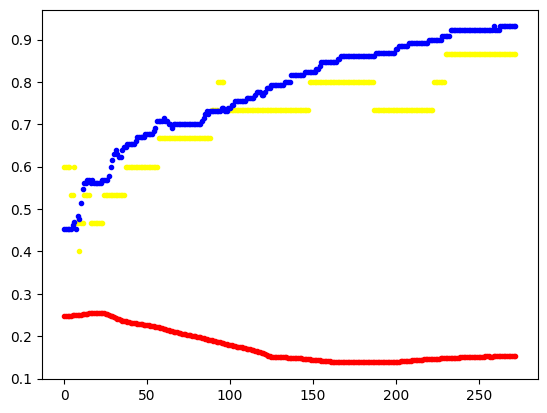

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint,EarlyStopping

import pandas as pd
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('/content/drive/MyDrive/colab/deeplearning/dataset/sonar.csv', header=None)

'''
print(df.info())
print(df.head())
'''

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj).astype(float)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X_train, Y_train, validation_split=0.1, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_vacc 에 테스트셋으로 측정한 정확도의 값을 저장
y_vacc=history.history['val_accuracy']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_vacc, "o", c="yellow", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()